In [17]:
import json
import os
from collections import OrderedDict, defaultdict

import numpy as np

np.set_printoptions(suppress=True)
path = 'data/'

## 读取数据

{ 

"萱月::小宝": list,  
"凰嫣::凌风": list,  
... 

}

list长度： 768，表示相应的人物之间对话内容的平均句向量

In [33]:
all_vectors = OrderedDict()
for root, dir_, files in os.walk(path):
    print(len(files))
    for index, file in enumerate(files):
        if index > 300:
            break
        file_path = os.path.join(root, file)
        novel_vector = json.load(open(file_path))
        all_vectors.update(novel_vector)
        
person_pairs = list(all_vectors.keys())
print(person_pairs, len(person_pairs))  # key
print(all_vectors['萱月::小宝'])  # 768维的向量

10
['萱月::小宝', '萱月::小獾', '萱月::星暗', '龙炎::萱月', '萱月::萧正南', '萱月::萧妃', '萱月::叶采城', '萱月::宋剑疯', '萱月::云蓓', '萱月::曹昊天', '萱月::萱仲武', '萱月::太皇太后', '玲珑::慕疏影', '昭浩康::慕疏影', '昭浩康::慕大小姐', '慕大小姐::丁三娘', '浑沌::傲千寻', '傲千寻::伊翎', '剑灵::傲千寻', '涞龙::傲千寻', '玄铭::傲千寻', '凌彦斌::傲千寻', '凡星::傲千寻', '雪柔::凌风', '龙绝::凌风', '凰嫣::凌风', '贝蒂::凌风', '韩雪::程宇', '程宇::兰雅', '程宇::心瑶', '程宇::杨若雪', '程宇::姚娜', '程宇::林雨菡', '程宇::天雪', '菲利克斯::杜迪安', '诺伊斯::杜迪安', '海利莎::杜迪安', '杜迪安::卡奇', '杜迪安::伊薇特', '珍妮::杜迪安', '福林::杜迪安', '黎塞留::杜迪安', '苏惠芳::王小兵', '谢家化::王小兵', '董莉莉::王小兵', '王小兵::张静', '王小兵::洪东妹', '慕颖诗::夏宇', '陆菲::夏宇', '徐欣::夏宇', '夏宇::倾言', '夏宇::叶魅', '陈芷::夏宇', '柯冉::夏宇', '胡沁::夏宇', '顾展宗::顾宁', '顾宁::方琼华', '顾宁::许晓笑', '顾宁::牧厉琛', '段子谦::尚擎泽', '段子谦::夏清絮', '夏清絮::夏启言', '夏清絮::叶青青', '段子谦::吴琦莲', '尚擎泽::夏清絮', '雷诗涵::尚擎泽'] 66
[0.053951337933540344, -0.3263324201107025, -0.5051100254058838, -0.015038097277283669, -0.21835432946681976, 0.06035087630152702, 0.22852352261543274, 0.09662476927042007, -0.739833652973175, 0.1715286374092102, 0.4623812735080719, -0.12310479581356049, 0.07268910

## 将向量变成numpy

In [34]:
np_vectors = np.array(list(all_vectors.values()))
print(np_vectors.shape)

(66, 768)


## 观察不同的k值下inertia_的情况

In [10]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os
import matplotlib
from matplotlib.font_manager import FontProperties

inertias = []
for i in range(2, 20, 1):
    k_means = KMeans(n_clusters=i)
    clf = k_means.fit(np_vectors)
    inertias.append(clf.inertia_)
    print(f'inertia_{i} = {clf.inertia_}')  # 评估簇个数的恰当性，越小越好

inertia_2 = 4700.102002176365
inertia_3 = 3966.154416420243
inertia_4 = 3463.387037868735
inertia_5 = 3180.1114891686443
inertia_6 = 2965.8202550287456
inertia_7 = 2758.941809021417
inertia_8 = 2612.966193963933
inertia_9 = 2497.436580258775
inertia_10 = 2329.764011811644
inertia_11 = 2177.432941532095
inertia_12 = 2076.847247933744
inertia_13 = 1935.8621201688397
inertia_14 = 1931.4467318501352
inertia_15 = 1842.50260164584
inertia_16 = 1717.1577646473047
inertia_17 = 1700.9681277411903
inertia_18 = 1550.242391850669
inertia_19 = 1492.670896978816


## 降维

- PCA
- TSNE

In [49]:
tsne = TSNE(n_components=2)  # 输出两维
tsne_data = tsne.fit_transform(np_vectors)  # 降维之后的数据
print(tsne_data.shape)

pca = PCA(n_components=2)
pca_data = tsne.fit_transform(np_vectors)
print(pca_data.shape)

(66, 2)
(66, 2)


## K-means聚类

In [50]:
class_nums = 4
k_means = KMeans(n_clusters=class_nums)
clf = k_means.fit(np_vectors)
# 每个样本所属的簇
labels = clf.labels_.tolist()
print(labels, len(labels))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 2, 2, 0, 1, 0, 2, 1, 2, 0, 0, 0, 3, 0, 2, 1, 1, 3, 3, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 1, 3, 3, 3] 66


## 每个类别的质心向量

In [42]:
clf.cluster_centers_.shape

(4, 768)

## 将降维之后每个类别对应的x，y存入字典

In [62]:
data_dict = defaultdict(list)

def data_append(label, data):
    x_key = f'x_{label}'
    y_key = f'y_{label}'
    data_dict[x_key].append(data[0])
    data_dict[y_key].append(data[1])
    
for index, label_ in enumerate(labels):
    data_append(label_, tsne_data[index])
    
print(data_dict.keys())
print(data_dict["x_1"])  # 表示标签为1的点的横坐标
print(data_dict["y_1"])  # 表示标签为1的点的纵坐标

dict_keys(['x_1', 'y_1', 'x_3', 'y_3', 'x_2', 'y_2', 'x_0', 'y_0'])
[17.712624, 14.2765255, 7.095497, -4.002444, 2.8046465, -5.7320385, 6.070128, 7.5520644, 11.325251, 6.4889717, 14.236483, -2.0760927, 1.157164, -2.9116058, 5.0001287, 2.2836466, 1.9127903, 17.049763, 14.573455, -2.0420504, 10.810415, 10.216619]
[-0.2741206, -9.753543, 0.09267565, -1.7703004, 1.9424329, 2.661343, 5.0915685, -9.168885, -1.7064389, -4.6643095, -4.5508575, 2.8384452, -2.652481, -6.850825, 9.871621, -8.332286, 7.394519, 7.0005765, 11.194228, 10.042721, 9.752507, 3.6036277]


## 可视化

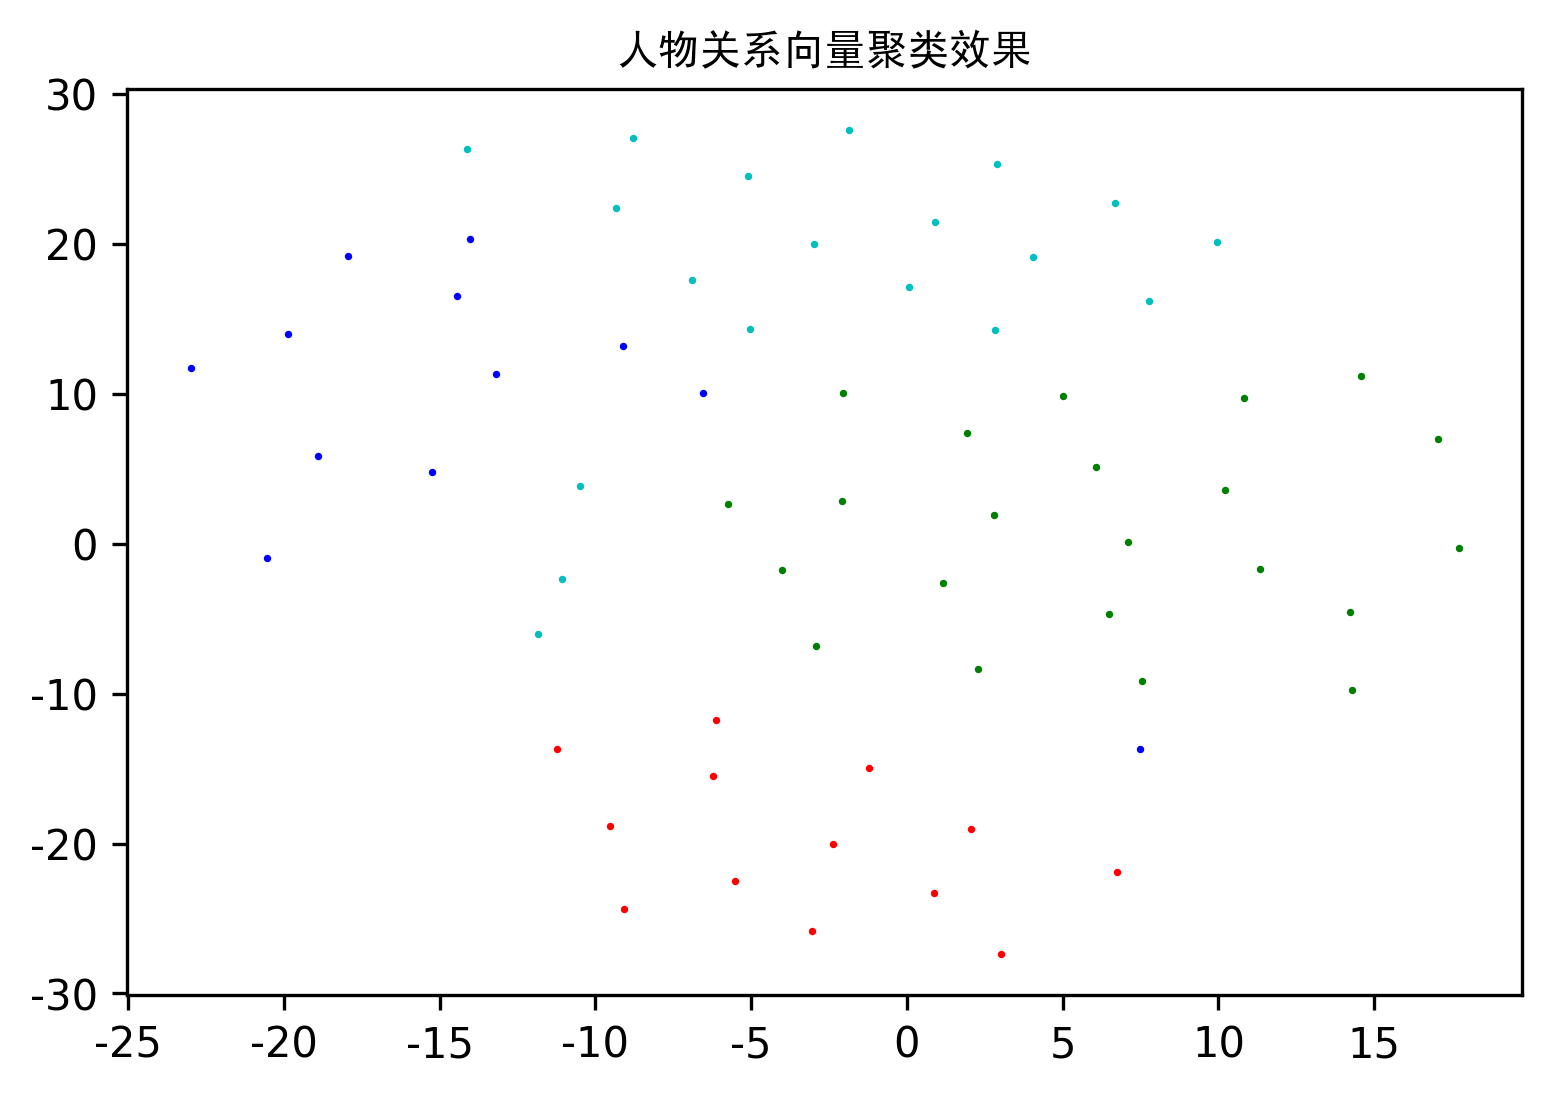

In [63]:
# 可视化基本设置
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300#分辨率
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
myfont = FontProperties(fname='font/SimHei.ttf')
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'steelblue', 'lightgray'] # 线条颜色


# 开始画图
for label_ in range(class_nums):
    x_key = f'x_{label_}'
    y_key = f'y_{label_}'
    plt.scatter(data_dict.get(x_key), data_dict.get(y_key), c=colors[label_], s=0.6)
    

plt.title('人物关系向量聚类效果', fontproperties=myfont)
plt.show()